In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline
plt.style.use('dark_background')
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


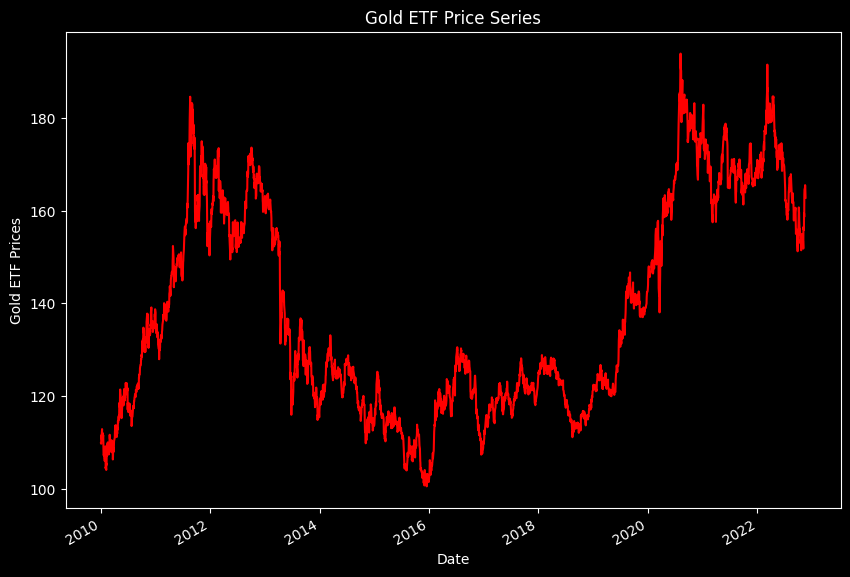

                 Close
Date                  
2010-01-04  109.800003
2010-01-05  109.699997
2010-01-06  111.510002
2010-01-07  110.820000
2010-01-08  111.370003
...                ...
2022-11-14  164.919998
2022-11-15  165.500000
2022-11-16  165.119995
2022-11-17  163.919998
2022-11-18  162.789993

[3244 rows x 1 columns]


In [6]:
Df = yf.download('GLD', '2010-01-01', '2022-11-19', auto_adjust=True)
Df = Df[['Close']]
Df = Df.dropna()
Df.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("Gold ETF Prices")
plt.title("Gold ETF Price Series")
plt.show()
print(Df[['Close']])

In [7]:
Df['S_3'] = Df['Close'].rolling(window=3).mean()
Df['S_9'] = Df['Close'].rolling(window=9).mean()
Df['next_day_price'] = Df['Close'].shift(-1)

Df = Df.dropna()
X = Df[['S_3', 'S_9']]

y = Df['next_day_price']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [9]:
## Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [11]:
lr = LinearRegression().fit(X_train_scaled, y_train)
y_lr= lr.predict(X_test_scaled)
print("Linear Regression model")
print("Gold ETF Price (y) = %.2f * 3 Days Moving Average (x1) \
+ %.2f * 9 Days Moving Average (x2) \
+ %.2f (constant)" % (lr.coef_[0], lr.coef_[1], lr.intercept_))

Linear Regression model
Gold ETF Price (y) = 108.15 * 3 Days Moving Average (x1) + -17.22 * 9 Days Moving Average (x2) + 101.61 (constant)


In [12]:
knn = KNeighborsRegressor(n_neighbors=3).fit(X_train_scaled, y_train)
y_knn = knn.predict(X_test_scaled)

In [13]:
dt = DecisionTreeRegressor().fit(X_train_scaled, y_train)
y_dt = dt.predict(X_test_scaled)

In [14]:
br = BayesianRidge().fit(X_train_scaled,y_train)
y_br = br.predict(X_test_scaled)

In [15]:
en = ElasticNet().fit(X_train_scaled,y_train)
y_en = en.predict(X_test_scaled)

In [16]:
gb = GradientBoostingRegressor().fit(X_train_scaled,y_train)
y_gb = gb.predict(X_test_scaled)

In [17]:
hr = HuberRegressor().fit(X_train_scaled,y_train)
y_hr = hr.predict(X_test_scaled)

In [18]:
svr = SVR().fit(X_train_scaled,y_train)
y_svr = svr.predict(X_test_scaled)

In [19]:
rf = RandomForestRegressor().fit(X_train_scaled,y_train)
y_rf = rf.predict(X_test_scaled)

In [20]:
et = ExtraTreesRegressor().fit(X_train_scaled,y_train)
y_et = et.predict(X_test_scaled)

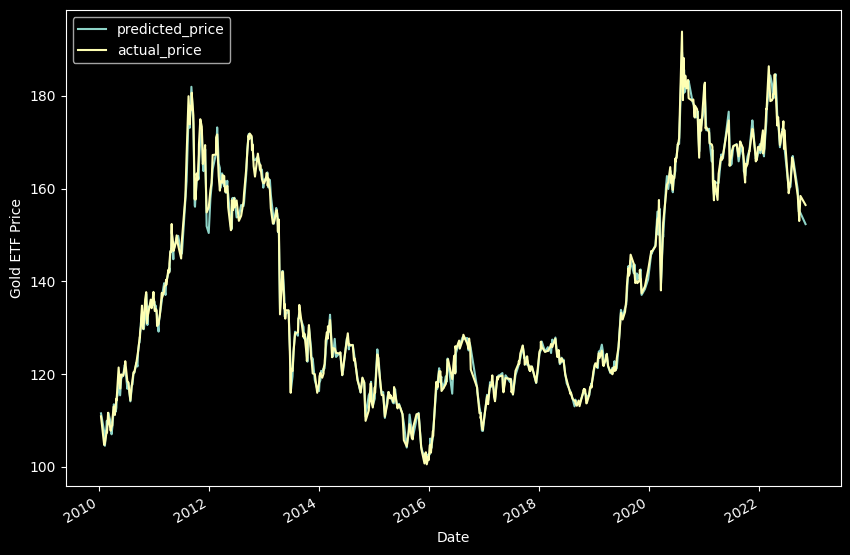

In [22]:
predicted_price = lr.predict(X_test_scaled)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold ETF Price")
plt.show()

In [23]:
from sklearn import metrics
lr_score = metrics.r2_score(y_test, y_lr)
knn_score = metrics.r2_score(y_test, y_knn)
dt_score = metrics.r2_score(y_test, y_dt)
br_score = metrics.r2_score(y_test, y_br)
en_score = metrics.r2_score(y_test, y_en)
gb_score = metrics.r2_score(y_test, y_gb)
hr_score = metrics.r2_score(y_test, y_hr)
svr_score = metrics.r2_score(y_test, y_svr)
rf_score = metrics.r2_score(y_test, y_rf)
et_score = metrics.r2_score(y_test, y_et)

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("*"*20, "Accuracy", "*"*20)

print("-"*50)
print("| Linear Regression: ", lr_score)
print("-"*50)

print("-"*50)
print("| KNearest Neighbors: ", knn_score)
print("-"*50)

print("-"*50)
print("| Decision Tree: ", dt_score)
print("-"*50)

print("-"*50)
print("| Bayesian Ridge: ", br_score)
print("-"*50)

print("-"*50)
print("| Elastic Net: ", en_score)
print("-"*50)

print("-"*50)
print("| Gradient Boosting: ", gb_score)
print("-"*50)

print("-"*50)
print("| Huber: ", hr_score)
print("-"*50)

print("-"*50)
print("| Support Vectore Machine: ", svr_score)
print("-"*50)

print("-"*50)
print("| Random Forest: ", rf_score)
print("-"*50)

print("-"*50)
print("| Extra Tree: ", et_score)
print("-"*50)

******************** Accuracy ********************
--------------------------------------------------
| Linear Regression:  0.9945573865801453
--------------------------------------------------
--------------------------------------------------
| KNearest Neighbors:  0.9930283623364634
--------------------------------------------------
--------------------------------------------------
| Decision Tree:  0.9879397572296557
--------------------------------------------------
--------------------------------------------------
| Bayesian Ridge:  0.9945580040704447
--------------------------------------------------
--------------------------------------------------
| Elastic Net:  0.34342100873104375
--------------------------------------------------
--------------------------------------------------
| Gradient Boosting:  0.994040972499781
--------------------------------------------------
--------------------------------------------------
| Huber:  0.9945792485593575
-----------------------

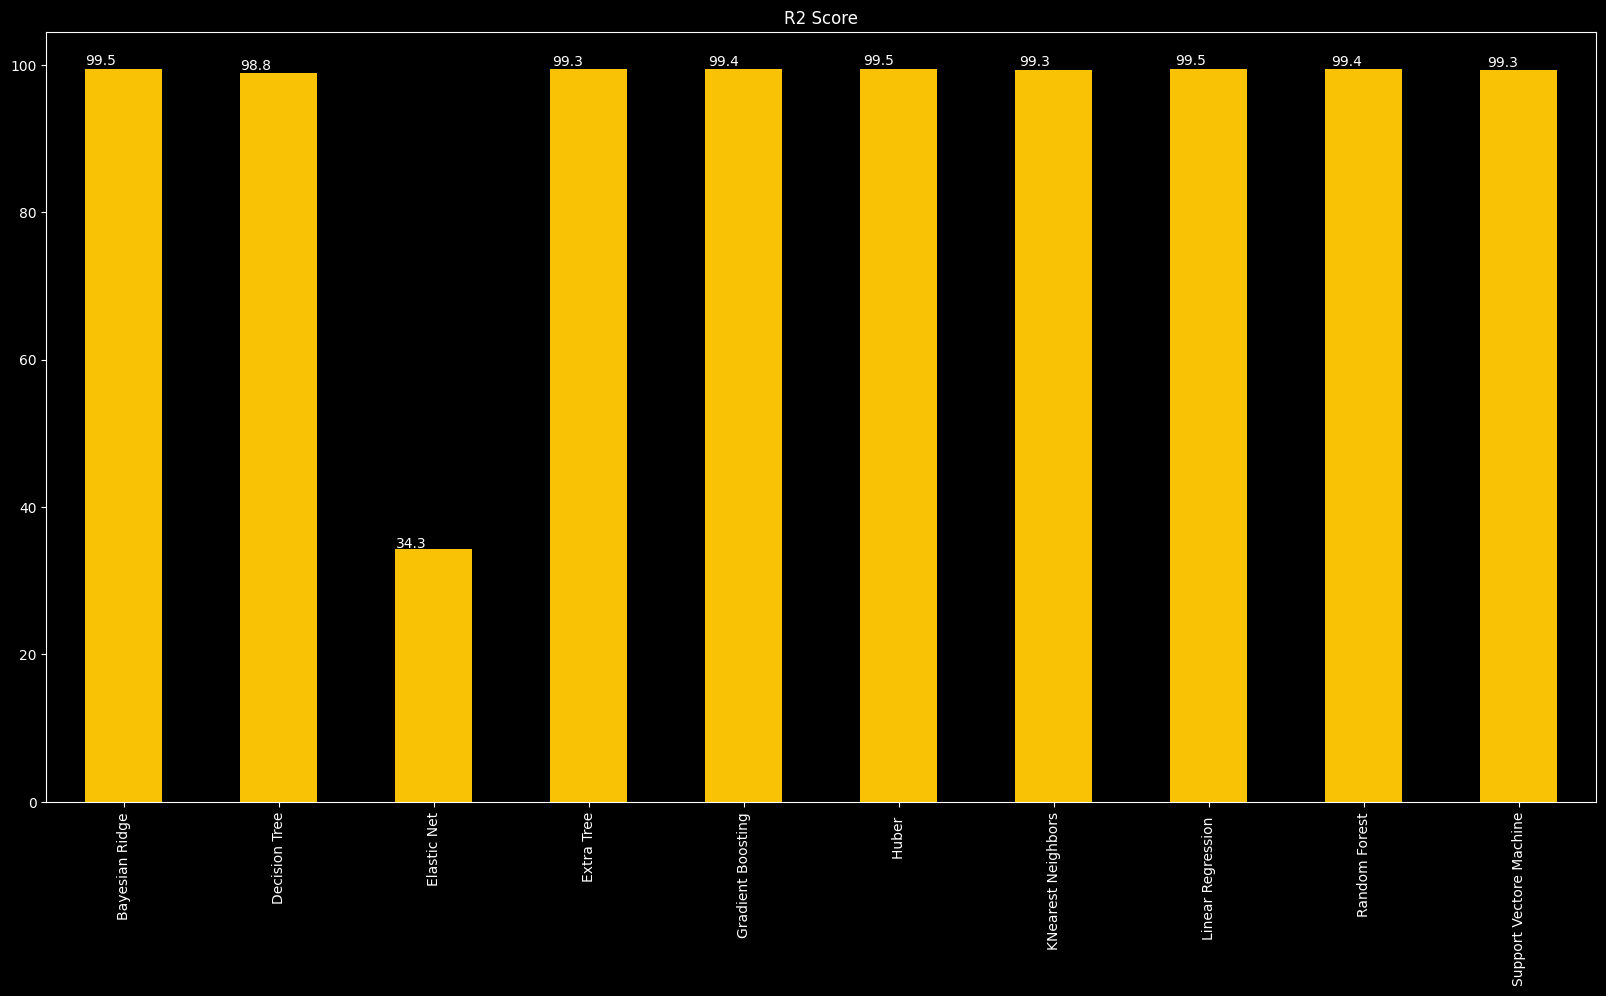

In [25]:
metric_val = {
    "R2 score": {
    "Linear Regression ": lr_score*100,
    "KNearest Neighbors": knn_score*100,
    "Decision Tree": dt_score*100,
    "Bayesian Ridge": br_score*100,
    "Elastic Net": en_score*100,
    "Gradient Boosting": gb_score*100,
    "Huber ": hr_score*100,
    "Support Vectore Machine": svr_score*100,
    "Random Forest": rf_score*100,
    "Extra Tree": et_score*100
    }
}

ax = pd.DataFrame(metric_val).plot(kind="bar", 
                             figsize = (20,10), 
                             legend =False, 
                             title = "R2 Score",
                             color = '#FAC205');
                    
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 1)), (p.get_x() * 1.005, p.get_height() * 1.005))


In [3]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 1, stop = 500, num = 500)]
criterion = ['squared_error', 'absolute_error']
max_depth = [int(x) for x in np.linspace(10, 200, num = 100)]
min_samples_split = [2, 5, 10, 20]
min_samples_leaf = [1, 2, 4, 8]
max_features = [None, 'sqrt', 'log2']
max_leaf_nodes = [int(x) for x in np.linspace(10, 200, num = 100)]
max_depth.append(None)

random_grid = {'n_estimators': n_estimators,
               'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes':max_leaf_nodes}
print(random_grid)

NameError: name 'np' is not defined

In [4]:
et = ExtraTreesRegressor()
et_random = RandomizedSearchCV(estimator = et, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=0, random_state=42, n_jobs = -1)
et_random.fit(X_train, y_train)

NameError: name 'ExtraTreesRegressor' is not defined

In [ ]:
et_random.best_params_

In [ ]:
et_tuned = ExtraTreesRegressor(**et_random.best_params_)
et_tuned.fit(X_train_scaled,y_train)

y_pred_et = et_tuned.predict(X_test_scaled)
r2ett = metrics.r2_score(y_test, y_pred_et)

print("-"*30)
print("Accuracy: ", r2ett)
print("-"*30)

In [ ]:
gold = pd.DataFrame()

gold['price'] = Df[t:]['Close']
gold['predicted_price_next_day'] = predicted_price
gold['actual_price_next_day'] = y_test
gold['gold_returns'] = gold['price'].pct_change().shift(-1)
gold['signal'] = np.where(gold.predicted_price_next_day.shift(1) < gold.predicted_price_next_day,1,0)

gold['strategy_returns'] = gold.signal * gold['gold_returns']
((gold['strategy_returns']+1).cumprod()).plot(figsize=(10,7),color='g')
plt.ylabel('Cumulative Returns')
plt.show()

In [ ]:
sharpe = gold['strategy_returns'].mean()/gold['strategy_returns'].std()*(252**0.5)
'Sharpe Ratio %.2f' % (sharpe)

In [ ]:
import datetime as dt
current_date = dt.datetime.now()

# Get the data
data = yf.download('GLD', '2008-06-01', current_date, auto_adjust=True)
data['S_3'] = data['Close'].rolling(window=3).mean()
data['S_9'] = data['Close'].rolling(window=9).mean()
data = data.dropna()

# Forecast the price

p = linear.predict(data[['S_3', 'S_9']])
data['predicted_gold_price'] = p
s = np.where(data.predicted_gold_price.shift(1) < data.predicted_gold_price,"Buy","No Position")
data['signal'] = s

# Print the forecast
data.tail(1)[['signal','predicted_gold_price']].T